In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# allmodels = np.load('/home/cheng/BayHunter-master/CH018/results/data/c_models.npy')
# read the model that has the best fit with mode of layers
x_age, y_rsl = np.loadtxt('tutorial/results/best_mode_model.txt').T
# allmodels = allmodels[~np.isnan(allmodels)]
x_age, y_rsl, x_age[1:]-x_age[:-1]

(array([-476.        , -329.79498291, -306.90179443,  -63.32329559,
          67.67319489,  231.49401855,  418.3704834 ,  466.4574585 ,
         564.62780762, 1129.24462891, 1400.98815918, 1852.70446777,
        1957.91821289, 2014.90161133]),
 array([-4.09045506, -3.96313095, -3.7943213 , -3.60804796, -3.11562443,
        -3.24088407, -2.60935235, -2.7524507 , -2.42600965, -1.57055867,
        -1.31921828, -0.62695622, -0.31849694,  0.01122918]),
 array([146.20501709,  22.89318848, 243.57849884, 130.99649048,
        163.82082367, 186.87646484,  48.0869751 ,  98.17034912,
        564.61682129, 271.74353027, 451.71630859, 105.21374512,
         56.98339844]))

In [56]:
station = 'NJ_CC.csv'
sea_level = pd.read_csv(station)
x_obs_raw = 1950-np.array(sea_level['Age'])
y_obs_raw = np.array(sea_level['RSL'])
sort_idx = np.argsort(x_obs_raw)
x_obs = x_obs_raw[sort_idx]
y_obs = y_obs_raw[sort_idx]

y_pred = np.interp(x_obs, x_age, y_rsl)

In [57]:
x_obs, y_pred

(array([-476, -455, -401, -339, -329, -319, -314, -307, -301, -292, -264,
        -240, -200, -124,  -87,  -53,  -40,  -19,   27,  148,  311,  335,
         387,  404,  409,  424,  457,  470,  477,  481,  490,  498,  505,
         514,  522,  533,  538,  551,  564,  573,  585,  604,  626,  666,
         685,  699,  708,  720,  732,  747,  767,  787,  804,  819,  835,
         849,  871,  907,  939,  967,  969,  994, 1009, 1010, 1024, 1029,
        1036, 1065, 1108, 1119, 1135, 1154, 1173, 1181, 1209, 1226, 1238,
        1248, 1255, 1286, 1294, 1318, 1323, 1420, 1463, 1509, 1521, 1532,
        1594, 1604, 1612, 1645, 1661, 1687, 1700, 1727, 1756, 1785, 1790,
        1803, 1829, 1861, 1864, 1867, 1873, 1877, 1882, 1887, 1894, 1904,
        1907, 1911, 1912, 1915, 1925, 1934, 1941, 1947, 1954, 1959, 1962,
        1965, 1967, 1969, 1971, 1975, 1978, 1983, 1986, 1987, 1988, 1989,
        1991, 1993, 1995, 2017]),
 array([-4.09045506, -4.07216699, -4.02514055, -3.97114723, -3.95726891,
     

Text(0, 0.5, 'RSL (m)')

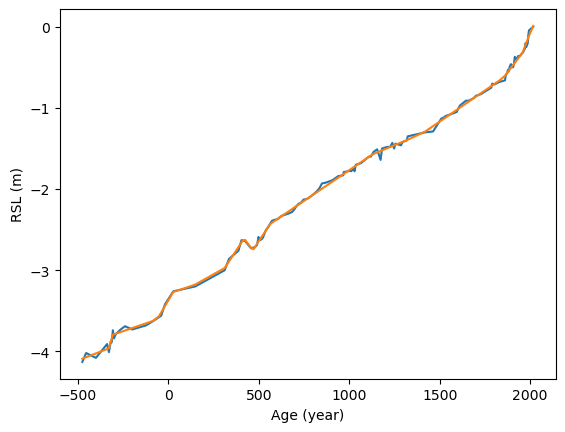

In [58]:
plt.plot(x_obs, y_obs, label = 'Observation')
plt.plot(x_obs, y_pred, label='Prediction')
plt.xlabel('Age (year)')
plt.ylabel('RSL (m)')

Text(0, 0.5, 'RSL change rate (mm/year)')

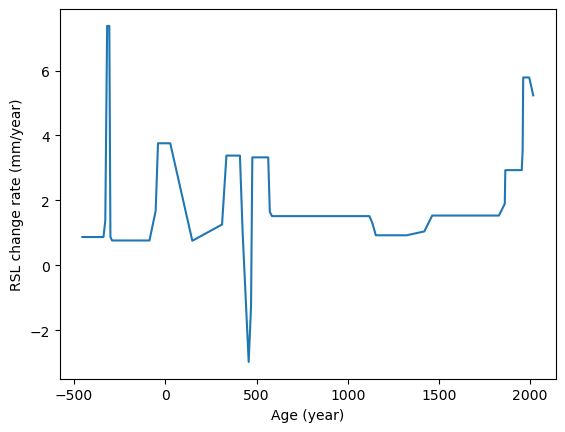

In [59]:
plt.plot(x_obs[1:], (y_pred[1:]-y_pred[:-1])/(x_obs[1:]-x_obs[:-1])*1000)
plt.xlabel('Age (year)')
plt.ylabel('RSL change rate (mm/year)')

The average rsl residual is -0.0003004530538199274


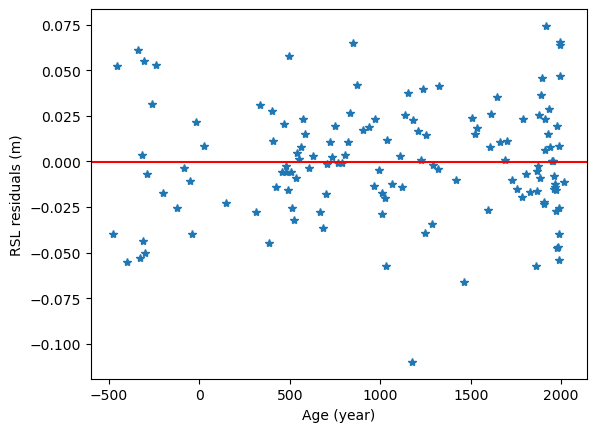

In [62]:
plt.plot(x_obs, y_obs-y_pred, '*')
plt.xlabel('Age (year)')
plt.ylabel('RSL residuals (m)')
print('The average rsl residual is', np.mean(y_obs-y_pred))
plt.axhline(np.mean(y_obs-y_pred), c='r')

Text(0.5, 0, 'Residuals')

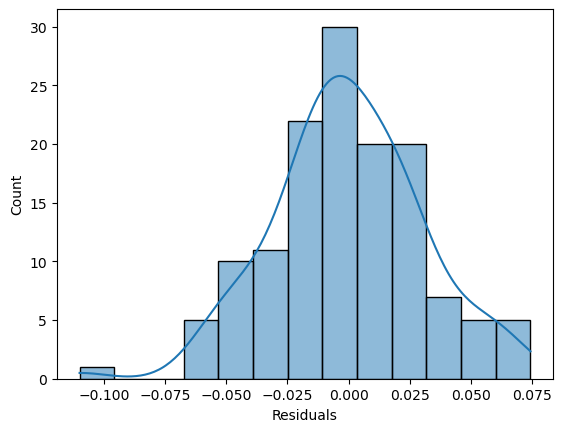

In [70]:
import seaborn as sns
sns.histplot(y_obs-y_pred, kde=True)
plt.xlabel('Residuals')